In [1]:
from scipy import optimize
from itertools import compress
import numpy as np
import matplotlib.pyplot as plt

def calculate_center_lsq(x,y, VERBOSE= True):
    def calc_R(xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    def f_2(c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    # coordinates of the barycenter
    x_m = np.mean(x)
    y_m = np.mean(y)
    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)

    if VERBOSE:
        print("Center / mm: {},{}".format(xc_2*1e3,yc_2*1e3))
        print("Radius / mm: {}".format(R_2*1e3))
        print("Residuum: {}".format(residu_2))

    return {'xc': xc_2, 'yc': yc_2, 'r': R_2, 'residuum': residu_2}

Center / mm: -0.012835666953944112, 0.01302956726072679


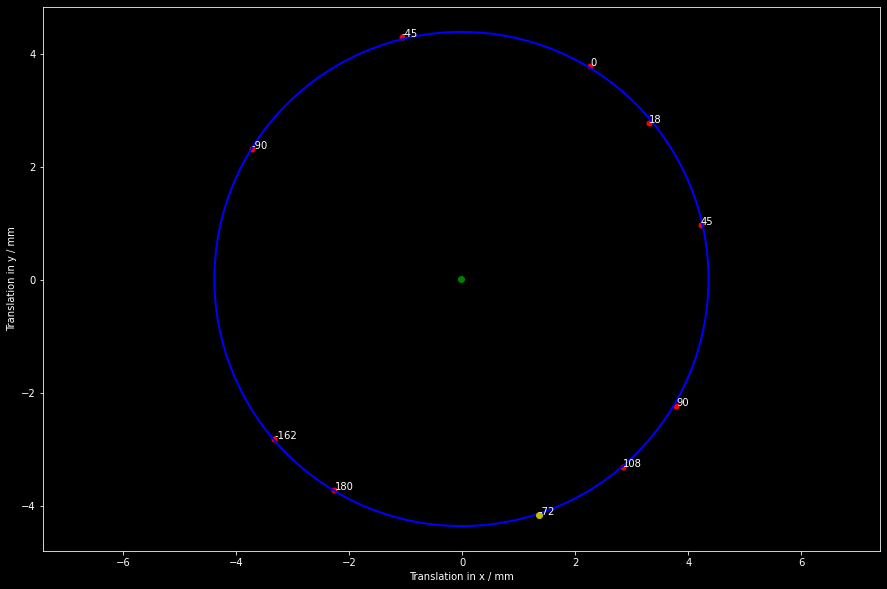

In [22]:


x_test = [3.7821, -3.7195, 2.2640, -2.2600, -3.3271, 3.3103, 2.8408,  4.2165, -1.0722]
y_test = [-2.2328, 2.3071, 3.7821, -3.7274, -2.8135, 2.7697, -3.3138, 0.9637, 4.2885]
phi_test = [90, -90, 0, 180, -162, 18, 108, 45, -45]

result_lsq_test = calculate_center_lsq(x_test, y_test, False)

from ctypes import resize
from matplotlib.patches import Arc as arc
plt.style.use('dark_background')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(x_test, y_test,'ro',linewidth=2, markersize=5)
for i, txt in enumerate(phi_test):
    ax.annotate(str(round(txt,1)), (x_test[i], y_test[i]))

ellipse = arc(xy=(result_lsq_test['xc'],result_lsq_test['yc']), width=2*result_lsq_test['r'], height=2*result_lsq_test['r'], angle=np.max(phi_test),
                edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)
ax.axis('equal')

ax.plot(result_lsq_test['xc'],result_lsq_test['yc'], 'go')
ax.set_xlabel('Translation in x / mm')
ax.set_ylabel('Translation in y / mm')

angle = -72
x_t2, y_t2 = result_lsq_test['r'] * np.cos(np.deg2rad(angle)), result_lsq_test['r'] * np.sin(np.deg2rad(angle))
ax.plot(x_t2, y_t2 , 'yo')
ax.annotate(str(angle), (x_t2, y_t2))

print("Center / mm: {}, {}".format(result_lsq_test['xc'],result_lsq_test['yc']))

plt.show()